# Random Walks with Tensorflow RNG

In [1]:
# Redefine the rng to be implemented in tensorflow
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
rng = tf.random

In [2]:
n_walkers = 2000
n_steps = 5000
t = np.arange(n_steps)
splot = []
fitplot = []
slopes = []
D = []

for dims in [1,2,3]:
    # Walkers can go in + direction, - direction, or stay still
    step_set = [-1, 0, 1]
    # The shape is for "n_walkers" taking "n_steps" in "dims" dimensions.
    # So, in 1d if there are 10 walkers making 100 steps each,
    # it will be (10, 100, 1)
    step_shape = (n_walkers,n_steps,dims)
    # These are the steps at each stage in tensorflow
    steps = rng.stateless_uniform(step_shape, [3, 9], minval=-1, maxval=2, dtype=tf.int32)
    # Convert the tensor into an array to sum
    steps = np.array(steps)
    # Now we add up the steps for each walker to get the x positions
    x = steps.cumsum(axis=1)
    # Now get the averages over the walkers
    x2 = np.average( x**2, axis=0 )
    x4 = np.average( x**4, axis=0 )
    sigma2_nd = np.sqrt( x4 - x2**2 )
    sigma2 = np.sum( sigma2_nd, axis=1 )
    splot.append(sigma2)
    res = np.polyfit(t, sigma2,1 )
    fitplot.append(res[0]*t + res[1])
    slopes.append( res[0] )
    D.append(res[0]/(2*dims))

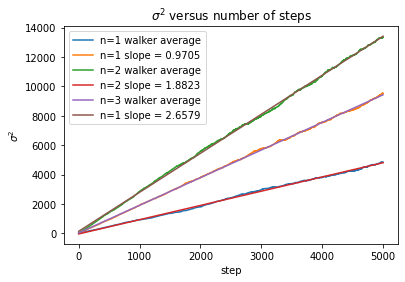

In [3]:
plt.plot(t, np.array(splot).T )
plt.plot(t, np.array(fitplot).T )
plt.title(r"$\sigma^2$ versus number of steps")
plt.xlabel("step")
plt.ylabel(r"$\sigma^2$")
plt.legend(['n=1 walker average',
            'n=1 slope = %2.4f' % slopes[0],
            'n=2 walker average',
            'n=2 slope = %2.4f' % slopes[1],
            'n=3 walker average',
            'n=1 slope = %2.4f' % slopes[2] ] )

We know that from our normal distribution, variance $\sigma^2=2\cdot n_{Dim} \cdot D t$, so our slope, $2\cdot n_{Dim} \cdot D$ Therefore:

In [4]:
for i in [0, 1, 2]:
    print("The diffusion constant for {0} dimension(s) is {1:2.4f}".format( i+1 , D[i] ))
    print("The theoretical value is 0.5, and for {0} dimension(s), we have an error of {1:2.2f} percent".format(i+1,(abs(D[i]-0.5)/0.5)*100))

The diffusion constant for 1 dimension(s) is 0.4853
The theoretical value is 0.5, and for 1 dimension(s), we have an error of 2.95 percent
The diffusion constant for 2 dimension(s) is 0.4706
The theoretical value is 0.5, and for 2 dimension(s), we have an error of 5.89 percent
The diffusion constant for 3 dimension(s) is 0.4430
The theoretical value is 0.5, and for 3 dimension(s), we have an error of 11.40 percent
